In [41]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Getting data

In [43]:
df1 = pd.read_csv('/content/drive/MyDrive/time_series_covid19_confirmed_global.csv')

### Covid19 confirmed cases globally until Feb 20, 2022

In [44]:
df1

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,...,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22,2/6/22,2/7/22,2/8/22,2/9/22,2/10/22,2/11/22,2/12/22,2/13/22,2/14/22,2/15/22,2/16/22,2/17/22,2/18/22,2/19/22,2/20/22
0,NaN,Afghanistan,33.939110,67.709953,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,...,158511,158602,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004,161057,161290,162111,162926,163555,164190,164727,165358,165711,166191,166924,167739,168550,169448,169940,170152,170604,171246,171422,171519,171673,171857,171931,172205
1,NaN,Albania,41.153300,20.168300,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,224569,226598,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577,254126,254126,255741,258543,258543,261240,261240,263172,263172,264624,264875,265716,266416,267020,267020,267551,268008,268304,268491,268940,269301,269601,269904,270164
2,NaN,Algeria,28.033900,1.659600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,...,223806,224383,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698,247568,249310,250774,252117,253520,254885,255836,256806,257598,257976,258478,259088,259673,260191,260723,261226,261752,262165,262570,262994,263369,263685,263936,264054
3,NaN,Andorra,42.506300,1.521800,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28899,28899,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028,35556,35556,35556,35958,35958,36315,36470,36599,36599,36599,36808,36808,36989,37074,37140,37140,37140,37277,37361,37452,37522,37589,37589,37589
4,NaN,Angola,-11.202700,17.873900,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91907,92581,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901,98029,98057,98076,98116,98226,98267,98319,98340,98351,98364,98409,98424,98453,98474,98501,98514,98514,98514,98555,98568,98585,98605,98617,98638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
279,NaN,West Bank and Gaza,31.952200,35.233200,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,473302,474234,474234,474234,474234,476328,477151,478084,479343,480583,480583,480583,484979,488599,492694,500444,504992,504992,504992,524716,535160,546176,556550,556550,556550,556550,578424,586355,594037,600128,600128,600128,600128,613846,618527,622175,625028,627956,627956,627956
280,NaN,Winter Olympics 2022,39.904200,116.407400,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,72,78,93,106,129,141,177,211,248,272,304,359,380,425,435,459,465,465,465,490,498,501,501,505,507,507,508,508,509
281,NaN,Yemen,15.552727,48.516388,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10220,10233,10233,10233,10252,10352,10408,10449,10507,10585,10585,10585,10585,10585,10821,10888,10942,10942,10942,11019,11061,11113,11145,11145,11149,11166,11266,11553,11579,11604,11659,11664,11671,11679,11699,11707,11718,11731,11731,11736
282,NaN,Zambia,-13.133897,27.849332,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,289415,291582,293695,295028,296132,29681

# Data Cleaning

Dropping the columns like *'Province/State'*, *'Lat'*, *'Long'* as they are irrelevant to the data.  And aggregating all data to sum up the number of confirmed cases in every *'Country/Region'* using *groupby*.

In [45]:
df1 = df1.drop(columns=['Province/State','Lat', 'Long'])
df1 = df1.groupby('Country/Region').sum()
df1

,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,1/28/20,1/29/20,1/30/20,1/31/20,2/1/20,2/2/20,2/3/20,2/4/20,2/5/20,2/6/20,2/7/20,2/8/20,2/9/20,2/10/20,2/11/20,2/12/20,2/13/20,2/14/20,2/15/20,2/16/20,2/17/20,2/18/20,2/19/20,2/20/20,2/21/20,2/22/20,2/23/20,2/24/20,2/25/20,2/26/20,2/27/20,2/28/20,2/29/20,3/1/20,...,1/12/22,1/13/22,1/14/22,1/15/22,1/16/22,1/17/22,1/18/22,1/19/22,1/20/22,1/21/22,1/22/22,1/23/22,1/24/22,1/25/22,1/26/22,1/27/22,1/28/22,1/29/22,1/30/22,1/31/22,2/1/22,2/2/22,2/3/22,2/4/22,2/5/22,2/6/22,2/7/22,2/8/22,2/9/22,2/10/22,2/11/22,2/12/22,2/13/22,2/14/22,2/15/22,2/16/22,2/17/22,2/18/22,2/19/22,2/20/22
Country/Region,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
Afghanistan,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,5,5,5,5,5,5,...,158511,158602,158639,158678,158717,158826,158974,159070,159303,159516,159548,159649,159896,160252,160692,161004,161057,161290,162111,162926,163555,164190,164727,165358,165711,166191,166924,167739,168550,169448,169940,170152,170604,171246,171422,171519,171673,171857,171931,172205
Albania,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,224569,226598,228777,230940,232637,233654,236486,239129,241512,244182,246412,248070,248070,248859,251015,252577,254126,254126,255741,258543,258543,261240,261240,263172,263172,264624,264875,265716,266416,267020,267020,267551,268008,268304,268491,268940,269301,269601,269904,270164
Algeria,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,1,1,1,...,223806,224383,224979,225484,226057,226749,227559,228918,230470,232325,234536,236670,238885,241406,243568,245698,247568,249310,250774,252117,253520,254885,255836,256806,257598,257976,258478,259088,259673,260191,260723,261226,261752,262165,262570,262994,263369,263685,263936,264054
Andorra,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,28899,28899,29888,29888,29888,29888,29888,29888,32201,33025,33025,33025,33025,34701,35028,35028,35556,35556,35556,35958,35958,36315,36470,36599,36599,36599,36808,36808,36989,37074,37140,37140,37140,37277,37361,37452,37522,37589,37589,37589
Angola,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,91907,92581,93302,93524,93694,93974,94275,94779,95220,95676,95902,96582,97263,97594,97812,97901,98029,98057,98076,98116,98226,98267,98319,98340,98351,98364,98409,98424,98453,98474,98501,98514,98514,98514,98555,98568,98585,98605,98617,98638
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
West Bank and Gaza,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,473302,474234,474234,474234,474234,476328,477151,478084,479343,480583,480583,480583,484979,488599,492694,500444,504992,504992,504992,524716,535160,546176,556550,556550,556550,556550,578424,586355,594037,600128,600128,600128,600128,613846,618527,622175,625028,627956,627956,627956
Winter Olympics 2022,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,72,78,93,106,129,141,177,211,248,272,304,359,380,425,435,459,465,465,465,490,498,501,501,505,507,507,508,508,509
Yemen,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,10220,10233,10233,10233,10252,10352,10408,10449,10507,10585,10585,10585,10585,10585,10821,10888,10942,10942,10942,11019,11061,11113,11145,11145,11149,11166,11266,11553,11579,11604,11659,11664,11671,11679,11699,11707,11718,11731,11731,11736


# Creating Datetime index

First, transposing the dataframe

In [46]:
df1=df1.T
df1

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,...,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
1/22/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1/23/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1/24/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,...,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1/25/20,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,...,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0
1/26/20,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,...,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2/16/22,171519,268940,262994,37452,98568,11,7395,8783208,410155,2967316,2362662,759753,33005,477750,1923031,52637,851636,3473015,55803,26567,8297,887089,366450,260491,27819996,25584,1054566,20729,553564,37947,55856,124343,118675,3216972,14187,7216,2709854,127248,6031130,8010,...,514880,1920150,863461,5043,26260,3648968,16903,10744394,631816,59939,865,77450,2414463,2628093,53148,19732,17783,33549,2656411,22047,36704,141,121271,971460,13173859,78174363,162932,4818112,871315,18575733,795316,234359,7,508042,2606824,622175,507,11707,310155,232213
2/17/22,171673,269301,263369,37522,98585,11,7395,8799858,411878,2990045,2393576,764202,33005,481512,1926570,52909,859884,3484518,55975,26567,8683,887089,367025,261913,27940119,27599,1059192,20743,556256,37947,55856,124787,119107,3224226,14187,7216,2747552,127796,6035143,8012,...,533425,1943101,868142,5565,26260,3652024,16903,10778607,633051,59939,865,77549,2418560,2628093,53278,19797,17783,33549,2674477,22138,36710,210,122093,974214,13266265,78275698,162932,4853339,872210,18628702,800833,234600,7,508968,2643024,625028,507,11718,310474,232598
2/18/22,171857,269601,263685,37589,98605,11,7400,8815247,413295,3013262,2424742,768019,33018,485163,1929154,53253,868078,3494223,56079,26567,9210,888175,367641,261913,28072238,27599,1063808,20744,559314,37947,55858,125201,119107,3231481,14187,7216,2783458,129341,6039163,8014,...,551519,1964411,871951,5565,26260,3654824,16903,10809222,634333,59939,865,77634,2422856,2664194,53403,19864,17783,33549,2693362,22261,36710,234,122717,979612,13353676,78423525,162973,4890332,873092,18676361,808012,234872,7,509947,2685463,627956,508,11731,310764,233030
2/19/22,171931,269904,263936,37589,98617,11,7408,8823054,414764,3030638,2424742,771709,33024,488423,1931304,53508,875934,3494223,56079,26567,9557,889044,367641,261913,28177367,27599,1066413,20745,562364,37947,55860,125753,119107,3235461,14187,7216,2819246,129914,6043661,8016,...,576355,1985859,875747,5684,26260,3657091,16903,10809222,635606,59939,

The index column is still a *'string'* type. Changing it into *'Datetime'* format using *pd.to_datetime* and *pd.DatetimeIndex*

In [47]:
df1.index = pd.to_datetime(df1.index, infer_datetime_format=True)
df1

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,...,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
2020-01-22,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,548,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,643,0,0,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,4,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,2,0,0,0,0,0
2020-01-24,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,920,0,0,...,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,5,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0
2020-01-25,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1406,0,0,...,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,0,0,6,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,2,0,0,0,0,0
2020-01-26,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,2075,0,0,...,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,8,0,0,0,0,0,0,5,0,0,0,0,0,0,0,0,2,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-16,171519,268940,262994,37452,98568,11,7395,8783208,410155,2967316,2362662,759753,33005,477750,1923031,52637,851636,3473015,55803,26567,8297,887089,366450,260491,27819996,25584,1054566,20729,553564,37947,55856,124343,118675,3216972,14187,7216,2709854,127248,6031130,8010,...,514880,1920150,863461,5043,26260,3648968,16903,10744394,631816,59939,865,77450,2414463,2628093,53148,19732,17783,33549,2656411,22047,36704,141,121271,971460,13173859,78174363,162932,4818112,871315,18575733,795316,234359,7,508042,2606824,622175,507,11707,310155,232213
2022-02-17,171673,269301,263369,37522,98585,11,7395,8799858,411878,2990045,2393576,764202,33005,481512,1926570,52909,859884,3484518,55975,26567,8683,887089,367025,261913,27940119,27599,1059192,20743,556256,37947,55856,124787,119107,3224226,14187,7216,2747552,127796,6035143,8012,...,533425,1943101,868142,5565,26260,3652024,16903,10778607,633051,59939,865,77549,2418560,2628093,53278,19797,17783,33549,2674477,22138,36710,210,122093,974214,13266265,78275698,162932,4853339,872210,18628702,800833,234600,7,508968,2643024,625028,507,11718,310474,232598
2022-02-18,171857,269601,263685,37589,98605,11,7400,8815247,413295,3013262,2424742,768019,33018,485163,1929154,53253,868078,3494223,56079,26567,9210,888175,367641,261913,28072238,27599,1063808,20744,559314,37947,55858,125201,119107,3231481,14187,7216,2783458,129341,6039163,8014,...,551519,1964411,871951,5565,26260,3654824,16903,10809222,634333,59939,865,77634,2422856,2664194,53403,19864,17783,33549,2693362,22261,36710,234,122717,979612,13353676,78423525,162973,4890332,873092,18676361,808012,234872,7,509947,2685463,627956,508,11731,310764,233030
2022-02-19,171931,269904,263936,37589,98617,11,7408,8823054,414764,3030638,2424742,771709,33024,488423,1931304,53508,875934,3494223,56079,26567,9557,889044,367641,261913,28177367,27599,1066413,20745,562364,37947,55860,125753,119107,3235461,14187,7216,2819246,129914,6043661,8016,...,576355,1985859,875747,5684,26260,3657091,1

# Exploring and Visualizing the Data

To know the confirmed number of cases in every country on the *1st* date of every month

In [48]:
df1[df1.index.day == 1]

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,...,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
2020-02-01,0,0,0,0,0,0,0,0,0,12,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,4,0,0,0,11891,0,0,...,16,0,0,0,0,0,0,1,1,0,0,0,1,0,0,10,0,0,19,0,0,0,0,0,0,8,0,0,4,2,0,0,0,0,6,0,0,0,0,0
2020-03-01,5,0,1,0,0,0,0,0,1,27,14,3,0,47,0,0,1,2,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,26,0,0,9,79932,0,0,...,106,0,0,0,0,0,0,84,1,0,0,0,14,27,0,40,0,0,42,0,0,0,0,0,0,32,0,0,21,94,0,0,0,0,16,0,0,0,0,0
2020-04-01,192,259,847,390,8,0,7,1054,571,4862,10711,359,21,569,54,34,163,13964,3,13,4,115,459,4,6836,131,422,282,15,2,6,109,233,10527,3,7,3137,82361,1065,0,...,1000,400,841,0,5,1380,0,104118,146,7,0,10,5320,17768,10,329,0,20,1771,1,36,0,90,423,15679,223542,44,794,814,43755,350,181,0,143,218,134,0,0,36,8
2020-05-01,2171,782,4154,745,30,0,25,4532,2148,6778,15531,1854,81,3170,8238,81,14917,49032,18,90,7,1229,1781,23,92202,138,1555,649,151,11,122,122,1832,57277,72,73,18687,83959,7006,1,...,17101,1403,1434,0,601,5951,45,215216,690,442,0,10,22133,29705,44,429,15,480,2960,24,123,0,116,998,122392,1110674,85,10861,13038,183500,648,2086,0,335,270,353,0,7,109,40
2020-06-01,15836,1143,9513,765,86,0,26,17415,9492,7221,16733,5662,102,11871,49534,92,43403,58517,18,243,43,10531,2524,38,531286,141,2519,847,228,63,458,125,6397,91748,1069,790,129020,84154,30493,106,...,35292,1522,1473,0,2023,34357,994,239638,1643,5026,0,44,39309,30871,123,443,3930,509,3082,24,443,0,117,1084,164769,1804734,457,24562,35192,258979,825,3702,0,1662,328,449,0,354,1089,203
2020-07-01,31848,2580,14272,855,291,0,69,67197,26065,8001,17873,18112,104,27414,149258,97,62424,61509,28,1199,77,34227,4606,227,1459494,141,5154,962,303,170,1267,141,12592,104358,3745,866,282043,84816,102009,303,...,44122,1687,1613,0,2924,159333,2021,249659,2054,9500,0,535,68608,31851,293,447,5954,509,3173,24,661,0,130,1175,201098,2694335,893,45924,49069,285276,943,8781,0,6062,355,2758,0,1190,1632,605
2020-08-01,36796,5396,30950,925,1164,0,91,196543,38841,17895,21212,32157,599,41190,239860,122,67946,69402,56,1805,102,78793,11876,804,2711992,141,11836,1143,353,395,2480,240,17255,116599,4614,936,357658,87827,306181,386,...,52512,2337,2171,0,3212,503290,2352,288522,2815,11644,0,1760,77379,35412,780,474,7409,509,3312,24,958,0,173,1552,231869,4602692,1176,72609,60760,305558,1278,24783,0,19443,590,12160,0,1730,6228,3659
2020-09-01,38282,9606,44833,1184,2729,0,94,428239,43878,25923,27642,36578,2276,52440,314946,176,71962,85487,1050,2145,227,117267,20234,1724,3959158,144,16454,1370,919,445,3970,274,19409,129388,4711,1017,413145,89933,624026,427,...,56852,3989,2924,0,3310,628259,2527,470973,3092,13189,0,4089,84521,42393,2830,488,8583,509,3417,27,1416,0,1797,3963,271705,6085899,3037,126279,70805,339403,1611,42127,0,47756,1044,23281,0,1962,12381,6559
2020-10-01,39371,13806,51690,2050,5114,0,101,765002,50850,27109,45686,40309,4123,71374,364987,193,79019,121059,1992,2357,282,135716,27749,3172,4853148,146,20833,2088,14383,510,6126,278,20838,162188,4829,1203,464750,90567,835339,484,...,57784,10938,5865,0,3593,676084,2704,778607,3382,13653,0,4891,93615,53832,4247,515,9769,509,3569,28,1809,0,4570,18413,320070,7287680,8287,218625,95348,462780,2061,57190,0,76029,1095,40322,0,2039,14802,7850
2020-11-01,41425,21202,58272,4825,11035,0,128,1173533,92254,27601,1

To know the confirmed number of cases in each country in the months of *August* since the pandemic started

In [49]:
df1[df1.index.month == 8]

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,...,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
2020-08-01,36796,5396,30950,925,1164,0,91,196543,38841,17895,21212,32157,599,41190,239860,122,67946,69402,56,1805,102,78793,11876,804,2711992,141,11836,1143,353,395,2480,240,17255,116599,4614,936,357658,87827,306181,386,...,52512,2337,2171,0,3212,503290,2352,288522,2815,11644,0,1760,77379,35412,780,474,7409,509,3312,24,958,0,173,1552,231869,4602692,1176,72609,60760,305558,1278,24783,0,19443,590,12160,0,1730,6228,3659
2020-08-02,36796,5519,31465,925,1199,0,91,201919,39050,18318,21304,32443,648,41536,240746,132,68067,69849,57,1805,102,80153,12296,804,2736058,141,11955,1143,353,395,2547,240,17255,116835,4614,936,359731,87985,317651,386,...,52825,2344,2180,0,3220,511485,2429,288522,2823,11738,0,1849,77417,35550,809,475,7451,509,3317,24,961,0,182,1561,232856,4650102,1182,73761,60999,306305,1286,25336,0,20206,621,12297,0,1734,6347,3921
2020-08-03,36796,5620,31972,937,1280,0,92,206743,39102,18730,21385,32684,679,41835,242102,132,68166,70314,57,1805,103,81846,12462,804,2756164,141,12159,1150,355,395,2583,240,17255,117091,4614,936,361493,88099,327850,386,...,53051,2354,2181,0,3220,516862,2429,297054,2828,11738,0,1893,77582,35616,847,474,7495,509,3320,24,976,0,182,1565,233851,4690978,1195,74781,61163,307244,1291,26066,0,20754,652,12541,0,1734,6580,4075
2020-08-04,36833,5750,32504,939,1344,0,92,213535,39298,19445,21481,32910,715,42132,244020,132,68250,70648,57,1914,105,83361,12856,804,2812447,141,12414,1153,356,395,2631,243,17718,117791,4618,938,362962,88206,334979,388,...,53346,2368,2190,0,3220,521318,2437,302814,2834,11780,0,1981,77916,35746,892,476,7538,509,3321,25,988,0,194,1584,234934,4752738,1203,75880,61352,307915,1300,27047,0,21438,672,12770,0,1760,6793,4221
2020-08-05,36915,5889,33055,939,1395,0,92,220682,39586,19890,21566,33103,751,42514,246674,133,68376,71158,86,1936,105,85141,13138,804,2868616,141,12717,1153,357,395,2689,243,17718,118156,4618,939,364723,88328,345714,388,...,54254,2417,2208,0,3227,529877,2437,305767,2839,11780,0,2050,78341,35927,944,476,7583,509,3328,25,1001,0,199,1601,236112,4807404,1213,77169,61606,308823,1309,27793,0,22299,717,13065,0,1763,7022,4221
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-08-27,152960,143174,194186,15025,46929,0,1598,5167733,240261,49935,683219,409745,17940,272148,1486153,4789,476265,1177909,16012,13366,2592,488933,212306,153793,20711339,2380,450144,13754,386202,11818,35079,91369,83425,1486454,11270,4989,1636627,106943,4901163,4055,...,66928,779136,265703,20,17016,2747018,11365,4831809,416961,37699,744,28462,1123413,770765,27436,15954,17096,1367,1139571,15960,20698,0,43999,654798,6311637,38836685,119327,2376571,714396,6697720,384531,153204,4,329736,410366,334472,0,7711,205704,124236
2021-08-28,153007,144079,194671,15025,47079,0,1638,5171458,240953,51256,684541,413986,17940,272246,1489589,4881,477901,1177909,16012,13366,2594,489802,212306,153793,20734286,2380,451148,13759,389134,11994,35147,91770,83425,1488248,11

To know the number of confirmed cases from March 01 to August 01 in the year 2020

In [50]:
df1['2020-03-01':'2020-08-01']

Country/Region,Afghanistan,Albania,Algeria,Andorra,Angola,Antarctica,Antigua and Barbuda,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahamas,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bolivia,Bosnia and Herzegovina,Botswana,Brazil,Brunei,Bulgaria,Burkina Faso,Burma,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,...,Singapore,Slovakia,Slovenia,Solomon Islands,Somalia,South Africa,South Sudan,Spain,Sri Lanka,Sudan,Summer Olympics 2020,Suriname,Sweden,Switzerland,Syria,Taiwan*,Tajikistan,Tanzania,Thailand,Timor-Leste,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,US,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Venezuela,Vietnam,West Bank and Gaza,Winter Olympics 2022,Yemen,Zambia,Zimbabwe
2020-03-01,5,0,1,0,0,0,0,0,1,27,14,3,0,47,0,0,1,2,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,26,0,0,9,79932,0,0,...,106,0,0,0,0,0,0,84,1,0,0,0,14,27,0,40,0,0,42,0,0,0,0,0,0,32,0,0,21,94,0,0,0,0,16,0,0,0,0,0
2020-03-02,5,0,3,1,0,0,0,0,1,30,18,3,0,49,0,0,1,8,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,32,0,0,9,80136,0,0,...,108,0,0,0,0,0,0,120,1,0,0,0,19,42,0,41,0,0,43,0,0,0,0,0,0,55,0,0,21,134,0,0,0,0,16,0,0,0,0,0
2020-03-03,5,0,5,1,0,0,0,1,1,39,21,3,0,49,0,0,1,13,0,0,0,0,0,0,2,0,0,0,0,0,0,1,0,37,0,0,10,80261,0,0,...,110,0,0,0,0,0,0,165,1,0,0,0,32,56,0,42,0,0,43,0,0,0,0,0,0,74,0,1,27,189,0,0,0,0,16,0,0,0,0,0
2020-03-04,5,0,12,1,0,0,0,1,1,52,29,3,0,52,0,0,6,23,0,0,0,0,0,0,4,0,0,0,0,0,0,1,0,42,0,0,10,80386,0,0,...,110,0,0,0,0,0,0,222,1,0,0,0,62,90,0,42,0,0,43,0,0,0,0,1,0,107,0,1,27,246,0,0,0,0,16,0,0,0,0,0
2020-03-05,5,0,12,1,0,0,0,1,1,55,41,6,0,55,0,0,6,50,0,0,0,0,2,0,4,0,0,0,0,0,0,1,0,46,0,0,13,80537,0,0,...,117,0,2,0,0,1,0,259,1,0,0,0,87,114,0,44,0,0,47,0,0,0,0,1,0,184,0,1,29,295,0,0,0,0,16,4,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-07-28,36454,4997,28615,907,1000,0,86,173355,37629,15582,20677,30858,447,39921,229185,110,67366,66662,48,1770,99,72327,10766,739,2503681,141,10871,1105,351,378,2354,226,17179,114961,4599,926,349800,86990,267385,354,...,51197,2204,2101,0,3212,459761,2305,280610,2810,11496,0,1510,76215,34609,694,467,7235,509,3297,24,896,0,153,1468,227982,4346567,1135,68030,59546,302254,1218,21699,0,16571,446,10938,0,1703,5002,2817
2020-07-29,36557,5105,29229,918,1078,0,91,178996,37937,16298,20850,31221,484,40311,232194,110,67518,67335,48,1805,99,73534,11127,804,2559132,141,11155,1105,351,387,2373,226,17255,115438,4605,926,351575,87213,276055,378,...,51531,2245,2115,0,3212,471123,2322,282641,2810,11579,0,1607,76516,34802,717,467,7276,509,3298,24,896,0,156,1488,228924,4411308,1140,69078,59921,303058,1237,22585,0,17158,459,11284,0,1711,5249,2879
2020-07-30,36628,5197,29831,922,1109,0,91,185373,38196,16903,20955,31560,508,40755,234889,110,67665,68006,48,1805,101,75234,11444,804,2617187,141,11420,1106,353,387,2418,234,17255,115862,4605,935,353536,87489,286020,378,...,51809,2265,2139,0,3212,482169,2322,285430,2814,11579,0,1607,76818,35022,738,467,7320,509,3304,24,908,0,164,1514,229891,4479012,1147,70300,60223,303906,1243,23271,0,17859,509,11548,0,1726,5555,3092
2020-07-31,36628,5276,30394,925,1148,0,91,191302,38550,17280,21130,31878,574,40982,237661,110,67808,68751,48,1805,101,76789,11876,804,2670451,141,11690,1106,353,387,2451,239,17255,116328,4608,936,355667,87655,295508,378,...,52205,2292,2156,0,3212,493183,2322,288522,2815,11579,0,1650,77076,35232,757,467,7366,509,3310,24,941,0,169,1535,230873,4544967,1154,71404,60506,304789,1264,24009,0,18574,558,11837,0,1728,5963,3169


Ranking the countries according to the total number of confirmed Covid19 cases

In [51]:
df1=df1.sort_values(by=df1.index.values[-1], axis=1, ascending=False)
df1

Country/Region,US,India,Brazil,France,United Kingdom,Russia,Germany,Turkey,Italy,Spain,Argentina,Iran,Netherlands,Colombia,Poland,Mexico,Indonesia,Ukraine,Japan,South Africa,Philippines,Israel,Czechia,Peru,Belgium,Canada,Malaysia,Portugal,Australia,Chile,Vietnam,Thailand,Switzerland,Romania,Denmark,Austria,Sweden,Greece,Iraq,"Korea, South",...,Taiwan*,Nicaragua,Tajikistan,South Sudan,Equatorial Guinea,Djibouti,Central African Republic,San Marino,Grenada,Gambia,Yemen,Liechtenstein,Dominica,Bhutan,Eritrea,Monaco,Niger,Saint Vincent and the Grenadines,Comoros,Guinea-Bissau,Sierra Leone,Antigua and Barbuda,Liberia,Chad,Sao Tome and Principe,Solomon Islands,Saint Kitts and Nevis,Palau,Kiribati,Summer Olympics 2020,Diamond Princess,Winter Olympics 2022,Tonga,Samoa,Holy See,Vanuatu,Antarctica,MS Zaandam,Marshall Islands,Micronesia
2020-01-22,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-23,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,2,4,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-24,2,0,0,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,0,0,0,0,2,5,0,0,0,0,0,0,0,2,...,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-25,2,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,0,0,0,0,0,0,0,4,0,0,0,2,6,0,0,0,0,0,0,0,2,...,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2020-01-26,5,0,0,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,0,0,0,0,0,0,1,4,0,4,0,2,8,0,0,0,0,0,0,0,3,...,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-02-16,78174363,42754315,27819996,22130264,18575733,14445698,13093881,13173859,12265343,10744394,8783208,6876565,5995894,6031130,5434424,5344840,4966046,4818112,4155027,3648968,3644597,3491958,3451318,3456789,3473015,3216972,3111514,3131899,2967316,2709854,2606824,2656411,2628093,2613716,2484869,2362662,2414463,2235920,2284205,1645978,...,19732,17895,17783,16903,15869,15535,14187,14086,13413,11924,11707,10837,10728,8297,9680,9111,8724,8248,8010,7889,7661,7395,7360,7216,5922,5043,5511,3303,2665,865,712,507,141,33,29,7,11,9,7,1
2022-02-17,78275698,42780235,27940119,22223882,18628702,14624423,13309040,13266265,12323398,10778607,8799858,6894110,6052397,6035143,5460552,5366405,5030002,4853339,4250142,3652024,3646793,3511868,3468364,3474965,3484518,3224226,3138215,3148387,2990045,2747552,2643024,2674477,2628093,2629090,2525517,2393576,2418560,2255421,2286451,1755806,...,19797,17895,17783,16903,15870,15535,14187,14086,13452,11924,11718,10958,10752,8683,9681,9128,8728,8468,8012,7891,7661,7395,7360,7216,5922,5565,5511,3425,2757,865,712,507,210,33,29,7,11,9,7,1
2022-02-18,78423525,42802505,28072238,22310014,18676361,14802439,13491802,13353676,12377098,10809222,8815247,6913427,6101775,6039163,5481938,5366405,5089637,4890332,4337780,3654824,3648925,3523457,3483932,3481752,3494223,3231481,3166023,3163869,3013262,2783458,2685463,2693362,2664194,2643614,2561714,2424742,2422856,2274025,2288777,1858009,...,19864,17895,17783,16903,15870,15537,14187,14147,13491,11924,11731,11051,10801,9210,9683,9162,8728,8468,8014,7905,7661,7400,7360,7216,5924,5565,5518,3463,2810,865,712,508,234,33,29,7,11,9,7,1
2022-02-19,78457081,42822473,28177367,22386566,18710375,14979363,13605445,13434130,12427773,10809222,8823054,6925485,6135447,6043661,5500728,5407711,5149021,4923680,4419254,3657091,3650748,3535055,3497820,3490988,3494223,3235461,3194848,3178029,3030638,2819246,2740293,2712315,2664194,2655933,2595018,2424742,2422856,2289330,2290011,1962837,...,19937,17

Picking the top 10 countries with the most number of confirmed Covid19 cases

In [52]:
df1 = df1.iloc[:,0:10]
df1

Country/Region,US,India,Brazil,France,United Kingdom,Russia,Germany,Turkey,Italy,Spain
2020-01-22,1,0,0,0,0,0,0,0,0,0
2020-01-23,1,0,0,0,0,0,0,0,0,0
2020-01-24,2,0,0,2,0,0,0,0,0,0
2020-01-25,2,0,0,3,0,0,0,0,0,0
2020-01-26,5,0,0,3,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...
2022-02-16,78174363,42754315,27819996,22130264,18575733,14445698,13093881,13173859,12265343,10744394
2022-02-17,78275698,42780235,27940119,22223882,18628702,14624423,13309040,13266265,12323398,10778607
2022-02-18,78423525,42802505,28072238,22310014,18676361,14802439,13491802,13353676,12377098,10809222
2022-02-19,78457081,42822473,28177367,22386566,18710375,14979363,13605445,13434130,12427773,10809222


Plotting the top 10 countries with the highest number of confirmed cases

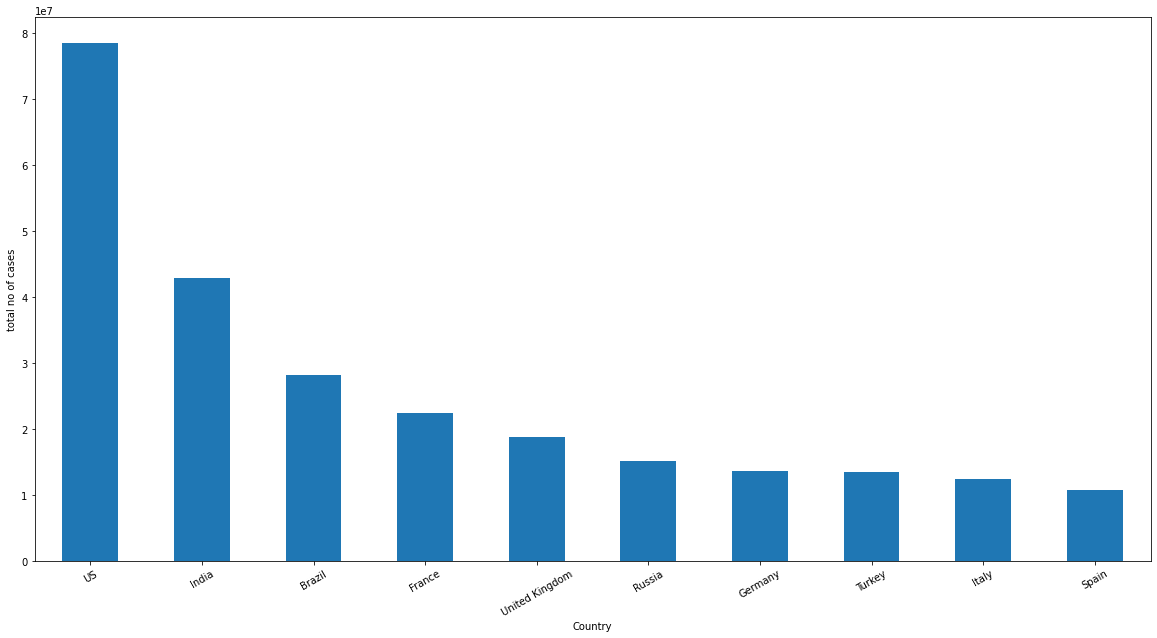

In [53]:
df1.iloc[-1].plot.bar(figsize=(20,10), rot=30)
plt.xlabel("Country")
plt.ylabel("total no of cases")
plt.show()

#### Resampling the DataFrame

Mean resampling the dataframe in a monthly time interval

In [54]:
df1.resample('M').mean()

Country/Region,US,India,Brazil,France,United Kingdom,Russia,Germany,Turkey,Italy,Spain
2020-01-31,4.100000e+00,2.000000e-01,0.000000e+00,3.000000e+00,2.000000e-01,2.000000e-01,1.800000e+00,0.000000e+00,2.000000e-01,0.000000e+00
2020-02-29,1.386207e+01,2.896552e+00,1.724138e-01,1.606897e+01,2.089655e+01,2.000000e+00,1.934483e+01,0.000000e+00,1.367586e+02,5.206897e+00
2020-03-31,3.617597e+04,3.307097e+02,1.197645e+03,1.315916e+04,9.130258e+03,3.943226e+02,1.897352e+04,1.896000e+03,3.902490e+04,2.395310e+04
2020-04-30,6.610275e+05,1.492023e+04,3.495020e+04,1.152102e+05,1.109237e+05,3.764790e+04,1.314308e+05,6.994023e+04,1.642841e+05,1.745592e+05
2020-05-31,1.460954e+06,9.962884e+04,2.577018e+05,1.807156e+05,2.263405e+05,2.663578e+05,1.750908e+05,1.458616e+05,2.230601e+05,2.291178e+05
2020-06-30,2.160706e+06,3.650571e+05,9.455437e+05,1.974167e+05,2.737740e+05,5.365860e+05,1.890254e+05,1.809857e+05,2.371744e+05,2.443731e+05
2020-07-31,3.583664e+06,1.059022e+06,2.027724e+06,2.141999e+05,2.942018e+05,7.494529e+05,2.020993e+05,2.165404e+05,2.438950e+05,2.623965e+05
2020-08-31,5.373484e+06,2.668864e+06,3.326451e+06,2.629094e+05,3.204352e+05,9.196143e+05,2.266043e+05,2.498349e+05,2.554717e+05,3.599691e+05
2020-09-30,6.655102e+06,5.057839e+06,4.408664e+06,4.533403e+05,3.854809e+05,1.076305e+06,2.674507e+05,2.954999e+05,2.916454e+05,6.105420e+05
2020-10-31,8.105720e+06,7.375542e+06,5.199624e+06,9.281821e+05,7.097553e+05,1.372566e+06,3.759046e+05,3.453987e+05,4.284263e+05,9.514417e+05


Plotting the resampled dataframe

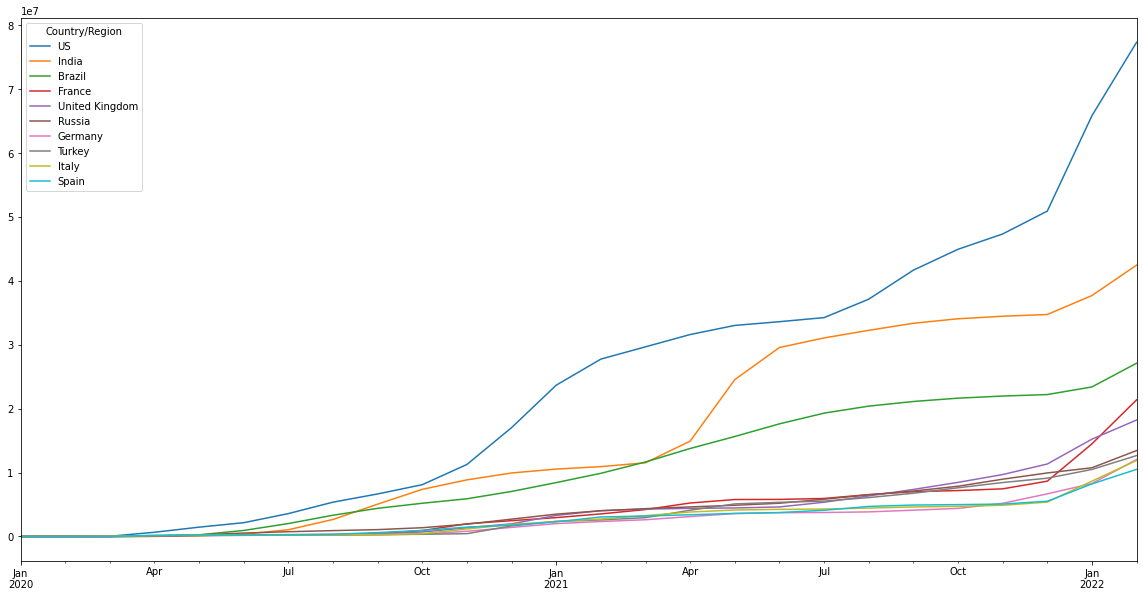

In [55]:
df1.resample('M').mean().plot(figsize=(20,10))

Finding *percentage change* in the number of confirmed cases in the top 10 countries in a monthly time interval

In [56]:
df1.resample('M').mean().pct_change()

Country/Region,US,India,Brazil,France,United Kingdom,Russia,Germany,Turkey,Italy,Spain
2020-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-02-29,2.380992,13.482759,inf,4.356322,103.482759,9.000000,9.747126,NaN,682.793103,inf
2020-03-31,2608.709116,113.173579,6945.341935,817.917763,435.926541,196.161290,979.805647,inf,284.356075,4599.263619
2020-04-30,17.272560,44.115805,28.182433,7.755130,11.149021,94.474877,5.927068,35.888309,3.209726,6.287543
2020-05-31,1.210127,5.677432,6.373401,0.568573,1.040507,6.074972,0.332190,1.085518,0.357770,0.312551
2020-06-30,0.478968,2.664171,2.669138,0.092417,0.209567,1.014530,0.079585,0.240804,0.063276,0.066582
2020-07-31,0.658562,1.900976,1.144505,0.085014,0.074616,0.396706,0.069165,0.196451,0.028336,0.073754
2020-08-31,0.499439,1.520122,0.640485,0.227402,0.089168,0.227047,0.121252,0.153756,0.047466,0.371852
2020-09-30,0.238508,0.895128,0.325336,0.724321,0.202992,0.170387,0.180254,0.182781,0.141596,0.696095
2020-10-31,0.217971,0.458240,0.179410,1.047429,0.841221,0.275258,0.405510,0.168863,0.468998,0.558356


Plotting the percentage change. The first row simply contains *Nan* so it is ignored

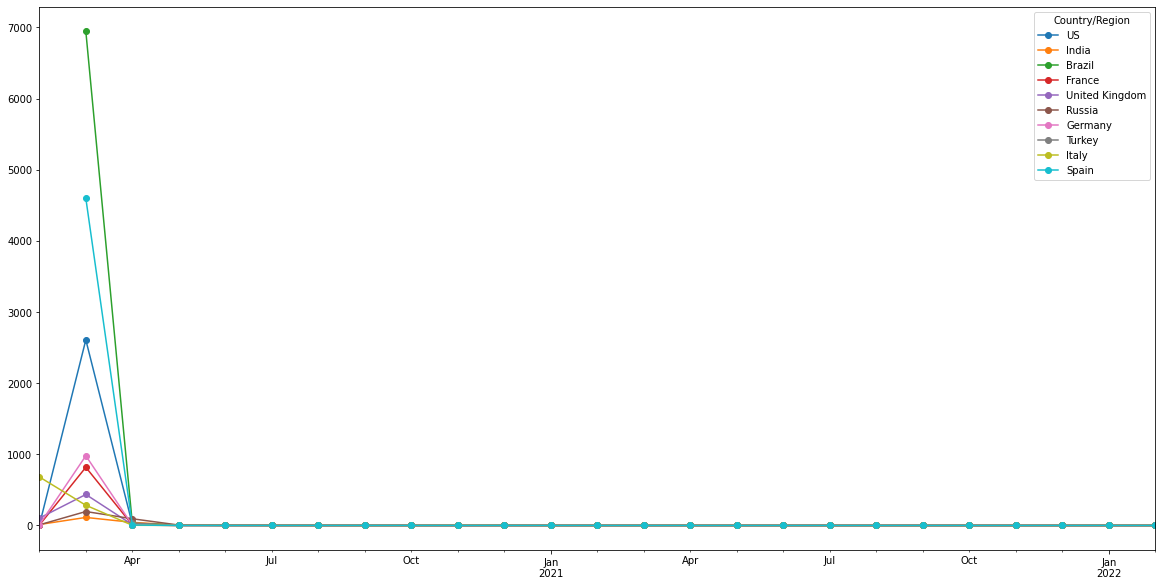

In [57]:
df1.resample('M').mean().pct_change().iloc[1:].plot(marker="o",figsize=(20,10))

# Analysing Covid19 data for United States 

Creating a new column for the total number of confirmed cases in the US

In [58]:
df_US = pd.DataFrame(index=df1.index, data=df1["US"].values, columns=["total cases in US"])
df_US

,total cases in US
2020-01-22,1
2020-01-23,1
2020-01-24,2
2020-01-25,2
2020-01-26,5
...,...
2022-02-16,78174363
2022-02-17,78275698
2022-02-18,78423525
2022-02-19,78457081


Plotting the total number of confirmed cases in the US

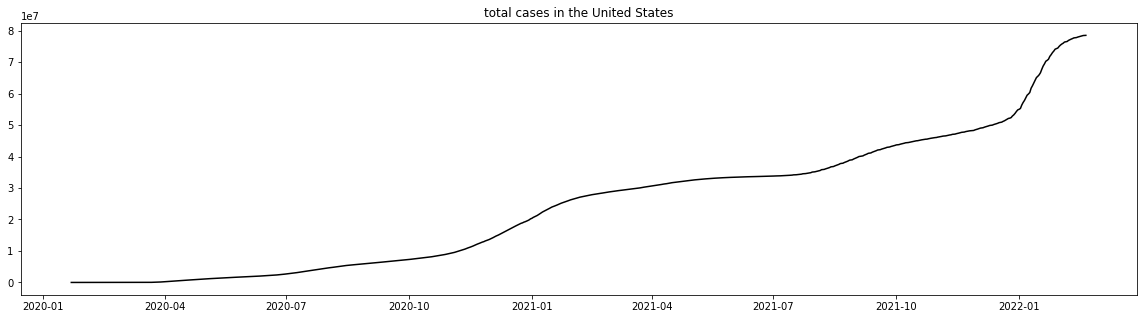

In [59]:
plt.figure(figsize=(20,5))
plt.plot(df_US.index, df_US["total cases in US"].values, color="black")
plt.title("total cases in the United States")
plt.show()

# Covid19 timeseries forecasting 

Preparing the training and testing data. Using the last 30 days as test data in this case

In [92]:
size = 30
train = df_US[:-size]
test = df_US[-size:]
print(f'Traning data: {len(train)} days \nTest data: {len(test)} days')

Traning data: 731 days 
Test data: 30 days


Scaling or normalizing the data using sklearn

In [93]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
scaler.fit(train)

train_scaled = scaler.transform(train)
test_scaled = scaler.transform(test)

Generating training and test data in sequences using TimeseriesGerenator

In [94]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator
seq_size = 10 #number of steps
n_features = 1 #number of features

train_generator = TimeseriesGenerator(train_scaled, train_scaled, length=seq_size, batch_size=1)
print(f"Original training data = {len(train)} days")
print(f"Actual training data = {len(train_generator)} days")

Original training data = 731 days
Actual training data = 721 days


In [95]:
test_generator = TimeseriesGenerator(test_scaled, test_scaled, length=seq_size, batch_size=1)
print(f"Original testing data = {len(test_scaled)} days")
print(f"Actual testing data = {len(test_generator)} days")

Original testing data = 30 days
Actual testing data = 20 days


Building the LSTM model for forecasting

In [96]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Activation

model = Sequential()
model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(seq_size, n_features)))
model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(seq_size, n_features)))
model.add(LSTM(128, activation='relu', return_sequences=True, input_shape=(seq_size, n_features)))
model.add(LSTM(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(1, activation='linear'))
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mse'])

model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm_13 (LSTM)              (None, 10, 128)           66560     
                                                                 
 lstm_14 (LSTM)              (None, 10, 128)           131584    
                                                                 
 lstm_15 (LSTM)              (None, 10, 128)           131584    
                                                                 
 lstm_16 (LSTM)              (None, 64)                49408     
                                                                 
 dense_6 (Dense)             (None, 64)                4160      
                                                                 
 dense_7 (Dense)             (None, 1)                 65        
                                                                 
Total params: 383,361
Trainable params: 383,361
Non-tr

Training the model

In [97]:
history = model.fit(train_generator, 
                    validation_data=test_generator, 
                    epochs=100, steps_per_epoch=10)

Epoch 1/100
10/10 [==============================] - 7s 228ms/step - loss: 0.2200 - mse: 0.2200 - val_loss: 0.8613 - val_mse: 0.8613
Epoch 2/100
10/10 [==============================] - 2s 163ms/step - loss: 0.0650 - mse: 0.0650 - val_loss: 0.0024 - val_mse: 0.0024
Epoch 3/100
10/10 [==============================] - 2s 160ms/step - loss: 0.0315 - mse: 0.0315 - val_loss: 0.4152 - val_mse: 0.4152
Epoch 4/100
10/10 [==============================] - 2s 162ms/step - loss: 0.0689 - mse: 0.0689 - val_loss: 0.0646 - val_mse: 0.0646
Epoch 5/100
10/10 [==============================] - 2s 168ms/step - loss: 0.0215 - mse: 0.0215 - val_loss: 0.0256 - val_mse: 0.0256
Epoch 6/100
10/10 [==============================] - 2s 165ms/step - loss: 0.0163 - mse: 0.0163 - val_loss: 0.1409 - val_mse: 0.1409
Epoch 7/100
10/10 [==============================] - 2s 164ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0261 - val_mse: 0.0261
Epoch 8/100
10/10 [==============================] - 2s 160ms/step - 

Plotting the training and validation loss for each epoch

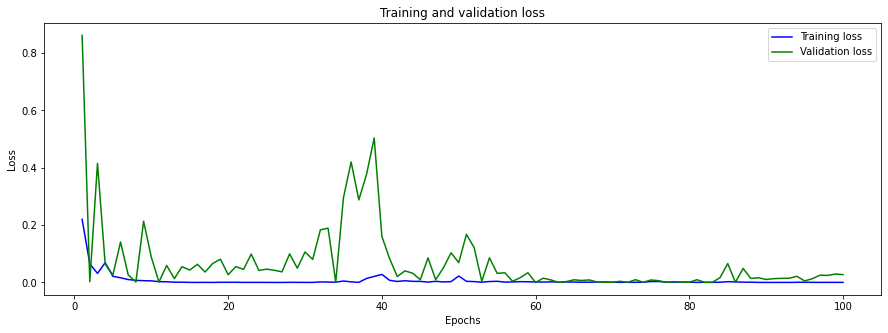

In [98]:
plt.figure(figsize=(15,5))
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'g', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

Making the prediction for next 7 days

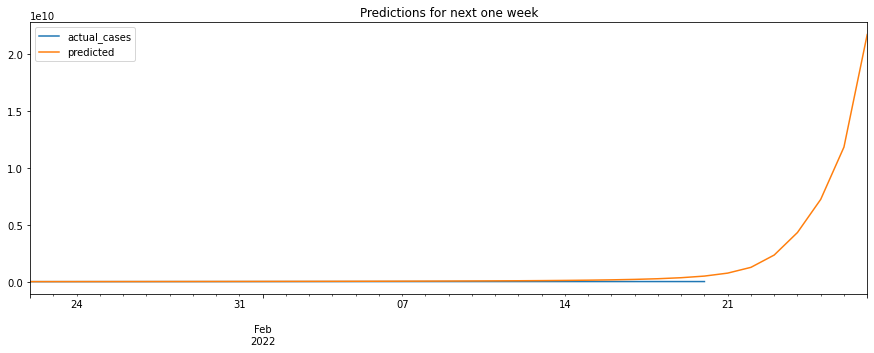

In [99]:
prediction = [] #Initializing an empty list for the predictions

current_batch = train_scaled[-seq_size:] #Final data points in train 
current_batch = current_batch.reshape(1, seq_size, n_features) #Reshape

future = 7 #predicting for next one week
for i in range(len(test) + future):
    current_pred = model.predict(current_batch)[0]
    prediction.append(current_pred)
    current_batch = np.append(current_batch[:,1:,:],[[current_pred]],axis=1)

#Inverse transforming to before scaling in order to get the actual numbers
rescaled_prediction = scaler.inverse_transform(prediction)

time_series_array = test.index  #Getting the dates of the test data

#Adding the dates for the next one week forecast period
for j in range(0, future):
    time_series_array = time_series_array.append(time_series_array[-1:] + pd.DateOffset(1))

#Creating a dataframe to capture the forecast data
df_forecast = pd.DataFrame(columns=["actual_cases","predicted"], index=time_series_array)

df_forecast.loc[:,"predicted"] = rescaled_prediction[:,0]
df_forecast.loc[:,"actual_cases"] = test["total cases in US"]

#Plotting the predictions
df_forecast.plot(title="Predictions for next one week", figsize=(15,5))
plt.show()